## Hierarchical Clustering model 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
data = pd.read_csv('/content/model_df.csv')
data.head()

,Project Stage,GPS (Latitude),GPS (Longitude),Mean share of harvest sold,School_count,Population of Sector,Access rate,Umurenge SACCO,MFIs,Bank Branch,ATM,Bank Agent,Mobile Money Agent,Banked,Other formal (non-bank),Informal only,Excluded,num_communities_served,Bridge Type_Other,Bridge Type_Suspended,Bridge Type_Suspension,Bridge Type_Unknown,Province_Eastern Province,Province_Kigali,Province_Northern Province,Province_Southern Province,Province_Western Province,District_Bugesera,District_Burera,District_Gakenke,District_Gasabo,District_Gatsibo,District_Gicumbi,District_Gisagara,District_Huye,District_Kamonyi,District_Karongi,District_Kayonza,District_Kicukiro,District_Kirehe,District_Muhanga,District_Musanze,District_Ngoma,District_Ngororero,District_Nyabihu,District_Nyagatare,District_Nyamagabe,District_Nyamasheke,District_Nyanza,District_Nyarugenge,District_Nyaruguru,District_Rubavu,District_Ruhango,District_Rulindo,District_Rusizi,District_Rutsiro,District_Rwamagana
0,0,-2.42056,28.96620,20.1,6,19359,64.0,38.35,49.45,53.433333,52.0,50.283333,32.35,27,38,14,21,5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,-2.42486,28.95726,20.1,6,19359,64.0,38.35,49.45,53.433333,52.0,50.283333,32.35,27,38,14,21,5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,-2.41855,28.96946,20.1,6,19359,64.0,38.35,49.45,53.433333,52.0,50.283333,32.35,27,38,14,21,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,-2.42715,28.95369,20.1,6,19359,64.0,38.35,49.45,53.433333,52.0,50.283333,32.35,27,38,14,21,5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,-2.44246,28.93330,20.1,6,19359,64.0,38.35,49.45,53.433333,52.0,50.283333,32.35,27,38,14,21,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Project Stage,GPS (Latitude),GPS (Longitude),Mean share of harvest sold,School_count,Population of Sector,Access rate,Umurenge SACCO,MFIs,Bank Branch,ATM,Bank Agent,Mobile Money Agent,Banked,Other formal (non-bank),Informal only,Excluded,num_communities_served,Bridge Type_Other,Bridge Type_Suspended,Bridge Type_Suspension,Bridge Type_Unknown,Province_Eastern Province,Province_Kigali,Province_Northern Province,Province_Southern Province,Province_Western Province,District_Bugesera,District_Burera,District_Gakenke,District_Gasabo,District_Gatsibo,District_Gicumbi,District_Gisagara,District_Huye,District_Kamonyi,District_Karongi,District_Kayonza,District_Kicukiro,District_Kirehe,District_Muhanga,District_Musanze,District_Ngoma,District_Ngororero,District_Nyabihu,District_Nyagatare,District_Nyamagabe,District_Nyamasheke,District_Nyanza,District_Nyarugenge,District_Nyaruguru,District_Rubavu,District_Ruhango,District_Rulindo,District_Rusizi,District_Rutsiro,District_Rwamagana
0,0.0,-0.000125,0.001496,0.001038,0.00031,0.999972,0.003306,0.001981,0.002554,0.00276,0.002686,0.002597,0.001671,0.001395,0.001963,0.000723,0.001085,0.000258,0.0,0.000052,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000052,0.0,0.0
1,0.0,-0.000125,0.001496,0.001038,0.00031,0.999972,0.003306,0.001981,0.002554,0.00276,0.002686,0.002597,0.001671,0.001395,0.001963,0.000723,0.001085,0.000258,0.0,0.000052,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000052,0.0,0.0
2,0.0,-0.000125,0.001496,0.001038,0.00031,0.999972,0.003306,0.001981,0.002554,0.00276,0.002686,0.002597,0.001671,0.001395,0.001963,0.000723,0.001085,0.000258,0.0,0.000000,0.000052,0.000000,0.0,0.0,0.0,0.0,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000052,0.0,0.0
3,0.0,-0.000125,0.001496,0.001038,0.00031,0.999972,0.003306,0.001981,0.002554,0.00276,0.002686,0.002597,0.001671,0.001395,0.001963,0.000723,0.001085,0.000258,0.0,0.000052,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000052,0.0,0.0
4,0.0,-0.000126,0.001495,0.001038,0.00031,0.999972,0.003306,0.001981,0.002554,0.00276,0.002686,0.002597,0.001671,0.001395,0.001963,0.000723,0.001085,0.000052,0.0,0.000000,0.000000,0.000052,0.0,0.0,0.0,0.0,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000052,0.0,0.0


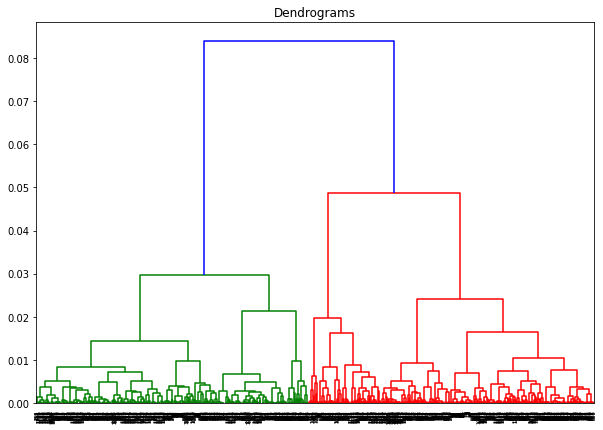

In [6]:
import scipy.cluster.hierarchy as shc 
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled,method='ward'))

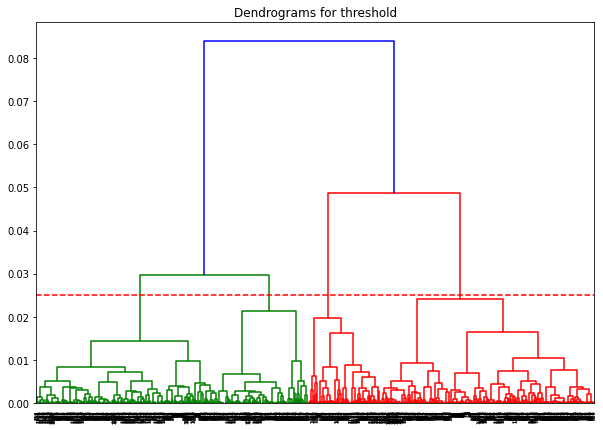

In [7]:
plt.figure(figsize=(10,7))
plt.title("Dendrograms for threshold")
dend = shc.dendrogram(shc.linkage(data_scaled,method='ward'))
plt.axhline(y=0.025,color='r',linestyle='--')

In [8]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)
cluster_list = cluster.fit_predict(data_scaled)

In [9]:
len(cluster_list)

1331

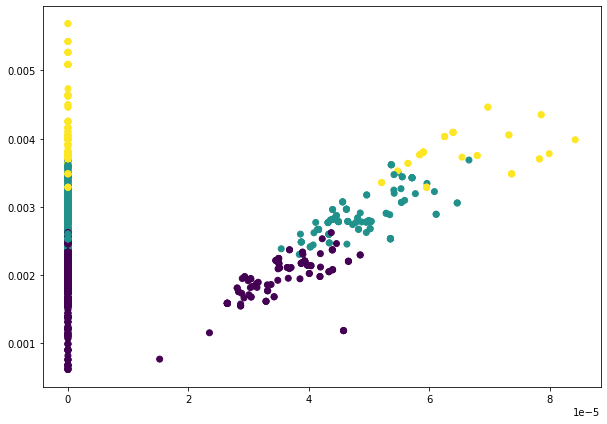

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['Project Stage'],data_scaled['Bank Branch'],c=cluster.labels_)

In [11]:
data['Cluster'] = cluster_list

In [12]:
data['Cluster'].value_counts()

0    651
1    508
2    172
Name: Cluster, dtype: int64

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/Lambda-School-Labs/Labs25-Bridges_to_Prosperity-TeamC-ds/main/final_csv/final_model_df.csv')

In [14]:
df.shape

(1347, 31)

In [15]:
# Replace "Unknown" in Lon and Lat with 0.0
df['GPS (Longitude)'].replace(to_replace="Unknown",value=0.0,inplace=True)
df[' GPS (Latitude)'].replace(to_replace="Unknown",value=0.0,inplace=True)

In [16]:
df.drop(df[df['Project Stage'] == 'Prospecting'].index,inplace=True)

In [17]:
# Drop outliers in long and latitude
df.drop(df[df[' GPS (Latitude)'] == 0.0].index,inplace=True)

In [18]:
df.drop(df[df['GPS (Longitude)'] == 0.0].index,inplace=True)

In [19]:
# Too many unknowns in number of individuals served, so we drop it 
df.drop(columns=['Individuals Directly Served'],inplace=True)

In [20]:
df.shape

(1331, 30)

In [21]:
data.shape

(1331, 58)

In [22]:
data_scaled.shape

(1331, 57)

In [23]:
# add cluster labels to df in db 
df['Cluster'] = cluster_list

In [24]:
# send csv to db 
df.to_csv('df_clusters.csv',index=False)